In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M','F',np.nan,'M','F'],
                  'score' : [5,4,3,4,np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [4]:
df['score']+1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [8]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [12]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score']+1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [13]:
df_nomiss = df.dropna(subset = ['score','sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [14]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [19]:
exam = pd.read_csv('exam.csv')
exam.loc[[2,7,4],['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,NaN,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [21]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam

,id,nclass,math,english,science
0,1,1,50.000000,98,50
1,2,1,60.000000,97,60
2,3,1,58.176471,86,78
3,4,1,30.000000,98,58
4,5,2,58.176471,80,65
5,6,2,50.000000,89,98
6,7,2,80.000000,90,45
7,8,2,58.176471,78,25
8,9,3,20.000000,98,15
9,10,3,50.000000,98,45


In [22]:
exam['math'].isna().sum()

0

In [38]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[64,123,130,152,211], "hwy"] = np.nan
mpg[['drv','hwy']].isna().sum()
mpg2 = mpg['hwy'].dropna()
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [40]:
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],
                'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [42]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [44]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [45]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [46]:
df['score']=np.where(df['score']>5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [47]:
df.dropna(subset = ['sex','score'])\
    .groupby('sex')\
    .agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


<Axes: ylabel='hwy'>

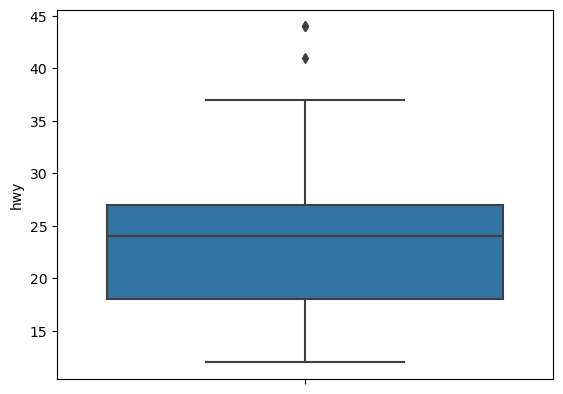

In [50]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [52]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [53]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [55]:
iqr = pct75-pct25
iqr

9.0

In [56]:
pct25-1.5*iqr

4.5

In [57]:
pct75+1.5*iqr

40.5

In [59]:
mpg['hwy'] = np.where((mpg['hwy']<4.5) | ((mpg['hwy']>40.5),
            np.nan, mpg['hwy'])

mpg['hwy'].isna().sum()

3

In [60]:
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [64]:
mpg.loc[[9,13,57,92],'drv'] = 'k'
mpg.loc[[28,42,128,202],'cty'] = [3,4,39,42]
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<Axes: ylabel='hwy'>

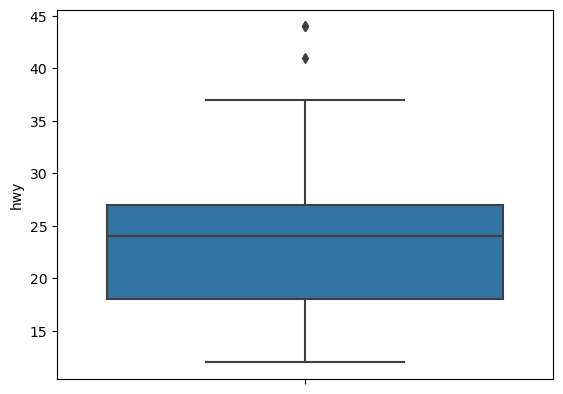

In [69]:
iqrsns.boxplot(data = mpg, y = 'hwy')

In [78]:
hwy75 = mpg['hwy'].quantile(.75)
hwy25 = mpg['hwy'].quantile(.25)
iqr_hwy = hwy75-hwy25

mpg['hwy'] = np.where((hwy75+1.5*iqr_hwy<mpg['hwy'])|(hwy25-1.5*iqr_hwy>mpg['hwy']), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()

234

<Axes: ylabel='cty'>

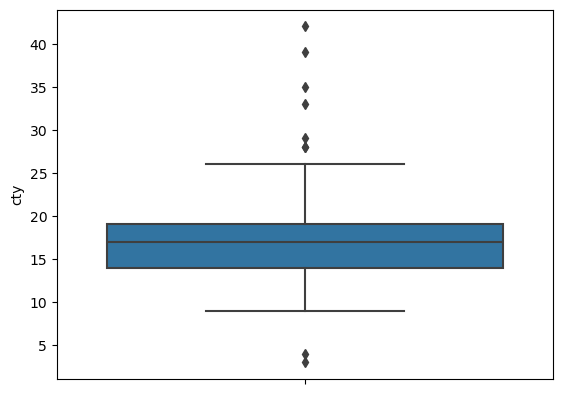

In [85]:
sns.boxplot(data = mpg, y = 'cty')

In [89]:
mpg['cty'].isna().sum()

0

In [95]:
cty_75 = mpg['cty'].quantile(.75)
cty_25 = mpg['cty'].quantile(.25)
cty_iqr = cty_75-cty_25
mpg['cty'] = mpg.where(((cty_75+cty_iqr*1.5<mpg['cty'])|(cty_25-cty_iqr*1.5>mpg['cty'])), np.nan, mpg['hwy'])
mpg['cty'].isna().sum()

TypeError: NDFrame.where() takes from 2 to 3 positional arguments but 4 were given

In [96]:
mpg.dropna(subset = ['drv'])\
    .groupby('cty')\
    .agg(mean_hwy = ('drv','mean'))

TypeError: agg function failed [how->mean,dtype->object]